First of all we have to import the libraries that we need in order to perform the linear regression. 


*   pandas - used to work work with data in a table manner
*   numpy  - used to work with arrays, numbers
*   sklearn - the library that offers us the posibility to create a linear regression model
*   sklearn.metrics - functions used to measure the metrics of the linear regresion model
*   matplotlib.pyplot - used to plot grafs



In [60]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn import preprocessing

After we have imported the librarie, we need to read our data from a .txt file. We read it using pandas. Pandas will create a dataFrame which will represent a table. When we read it, we can also specify the names for the columns and later we can use these names to retrieve partial data from the table. The column that we know what they represent are: complexAge, totalRooms, totalBedrooms, complexInhabitats, aprtmentNr and medianComplexValue. The medianComplexValue is the one that depends on the orher ones and we whould predict this values using our linear regression model.

In [66]:
pd_data = pd.read_csv(
    'apartmentComplexData.txt', 
    delimiter=',' 
)

**Normalization**

We use the package sklearn and its associated preprocessing utilities to normalize the data.

In [67]:
data = pd_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)
pd_data = pd.DataFrame(data_scaled)

pd_data.columns = [
      '1',
      '2',
      'complexAge',
      'totalRooms',
      'totalBedrooms',
      'complexInhabitants',
      'apartmentsNr',
      '8',
      'medianCompexValue'
]

pd_data

,1,2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,8,medianCompexValue
0,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
1,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
2,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
3,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638
4,0.209163,0.564293,1.000000,0.023323,0.032899,0.011491,0.031574,0.243921,0.525155
...,...,...,...,...,...,...,...,...,...
20634,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105
20635,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043
20636,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383
20637,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713


The medianComplexValue depends on more values, not just one. Some of those columns have a bigger impact on the medianComplexValue especially when the model is beeing trained. We have to detemine what column are significant for the medianComplexValue. To see the corelation between each variable and the medianComplexValue we will plot on the x axis the variable and on the y axis the medianComplexValue. The graf will show us how the y changes in corelation to x. All variables should be tested, but for demonstration purposes we will show just some of them to explain the importance of these variables.


As we can see in the plots bellow, in the first plot, where we have complexInhabitats on x and medianComplexValue on y, the x axis takes values mostly from 0 to 0.4 while on the y axis the values cover all the range of y axis. 

From the plot we can conclude that the medianComplexValue is evenly distributed, or, it does not have a direction. But, as we will see in the next examples, there is a varaible that makes medianComlValue go in one direction.

No handles with labels found to put in legend.


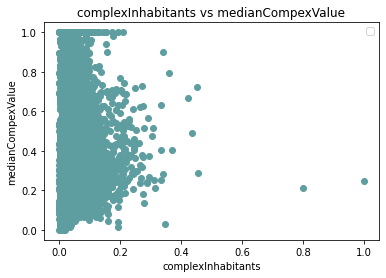

In [68]:
x = pd_data['complexInhabitants']
y = pd_data['medianCompexValue']

plt.plot(x, y, 'o', color ='cadetblue')

plt.title("complexInhabitants vs medianCompexValue")
plt.xlabel("complexInhabitants")
plt.ylabel("medianCompexValue")
plt.legend()

plt.show()


In the second graf, we ploted on the x axis the values from the 8th column and on the y axis the median complex value. The difference between this plot and the previous one is that the distribution of values has a clear slope. Or, in other words, there is a positive relation between them. Clearly we can see the there is a corelation between the 8th column and the medianComplexValue.

No handles with labels found to put in legend.


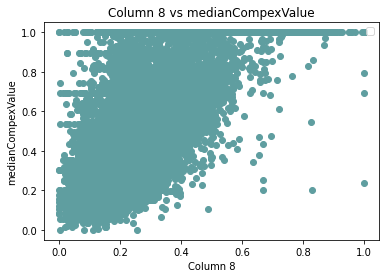

In [69]:
x = pd_data['8']
y = pd_data['medianCompexValue']

plt.plot(x, y, 'o', color ='cadetblue')

plt.title("Column 8 vs medianCompexValue")
plt.xlabel("Column 8")
plt.ylabel("medianCompexValue")
plt.legend()

plt.show()

Now, we know that the 8th column is important in the process of training out linear regression model. So we have to take this into account.

**Measure the Correlation**

In [70]:
# let's measure that correlation
pd_data.corr()

,1,2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,8,medianCompexValue
1,1.000000,-0.924661,-0.108141,0.044519,0.068320,0.099717,0.055251,-0.015028,-0.045837
2,-0.924661,1.000000,0.011123,-0.036060,-0.066272,-0.108740,-0.070989,-0.079941,-0.144289
complexAge,-0.108141,0.011123,1.000000,-0.361238,-0.320453,-0.296212,-0.302884,-0.119164,0.105536
totalRooms,0.044519,-0.036060,-0.361238,1.000000,0.929891,0.857121,0.918482,0.198171,0.134253
totalBedrooms,0.068320,-0.066272,-0.320453,0.929891,1.000000,0.878020,0.979828,-0.007984,0.050701
complexInhabitants,0.099717,-0.108740,-0.296212,0.857121,0.878020,1.000000,0.907218,0.004946,-0.024552
apartmentsNr,0.055251,-0.070989,-0.302884,0.918482,0.979828,0.907218,1.000000,0.013146,0.065952
8,-0.015028,-0.079941,-0.119164,0.198171,-0.007984,0.004946,0.013146,1.000000,0.688000
medianCompexValue,-0.045837,-0.144289,0.105536,0.134253,0.050701,-0.024552,0.065952,0.688000,1.000000



Okay, so there is a correlation and a strong one at that. Generally speaking, this is how we measure the strength of correlations.

* Very strong relationship (|r|>0.8 =>)
* Strong relationship (0.6≤|r|)
* Moderate relationship (0.4≤|r|)
* Weak relationship (0.2≤|r|)
* Very weak relationship (|r|)


Now, we've demonstrated that the 8th column hs the strogens corelation, wchich is 0.688075.

**Create a Statistical Summary**

Okay, so we see there is a correlation let us create a statistical summary to help describe the dataset. We will use the describe() method to output a DataFrame with all this info. This will help us have a general idea about how the data is distribured.

In [71]:
# let's take a look at a statistical summary.
pd_data.describe()

,1,2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,8,medianCompexValue
count,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000
mean,0.476138,0.328560,0.541939,0.066988,0.083321,0.039870,0.081986,0.232449,0.395555
std,0.199551,0.226987,0.246776,0.055487,0.065371,0.031740,0.062873,0.131006,0.237908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036777,0.045701,0.021974,0.045881,0.142288,0.215671
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209294,0.339588
75%,0.631474,0.549416,0.705882,0.080014,0.100248,0.048264,0.099326,0.292613,0.514845
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Split the Data**

The first thing we need to do before training the model is split the data into a training set and a test set. The training set is what we will train the model on and the test set is what we will test it on. The convention is to have 20% dedicated to testing and the remaining 80% to training, but these are not hard limits.

In [74]:
# take randomly 80% of the data for training purposes
# and the ramaining 20% remain for test purposes
msk = np.random.rand(len(pd_data)) < 0.8
train_data = pd_data[msk]
test_data = pd_data[~msk]

**Create & Fit the model**

We used the linear_model.LinearReggression() from sklearn to create our linear regresion model. The fit() method is used to train the model. As we can see, all 8 columns were used at the training phase and most important - column 8 should be used, because it has a bigger correlation with the medianComplexValue. The fit() method takes two arguments. the first one represents the variables and the second one represents the true values.

In [75]:
reg = linear_model.LinearRegression()
reg.fit(
    train_data[[
      '1',
      '2',
      'complexAge',
      'totalRooms',
      'totalBedrooms',
      'complexInhabitants',
      'apartmentsNr',
      '8',
    ]], 
    train_data[['medianCompexValue']]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Making Multiple Predictions at Once**

Now we use those 20% of testing data to make predictions.

In [76]:
test_predictions = reg.predict(
    test_data[[
      '1',
      '2',
      'complexAge',
      'totalRooms',
      'totalBedrooms',
      'complexInhabitants',
      'apartmentsNr',
      '8'   
    ]]
)

test_predictions

array([[0.6304773 ],
       [0.34444398],
       [0.35718367],
       ...,
       [0.09704677],
       [0.16952976],
       [0.01845385]])

**R-Squared**

The R-Squared metric provides us a way to measure the goodness of fit or how well our data fits the model. The higher the R-Squared metric, the better the data fit our model.

In [78]:
r2score = r2_score(y_true, y_pred)
print("r2_score = ", r2score)

r2_score =  0.629817486179757


**Plot the prediction**

To plot the prediction we will use only the variables from the 8th column, because they have a clear direction of distribution.

We will plot the testing data with its true values and then with blue we will plot the testing data with the predicted values.

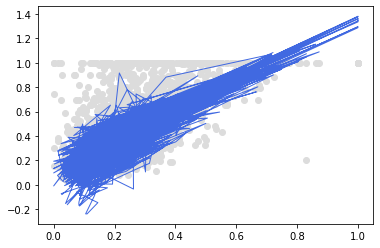

In [79]:
plt.scatter(test_data[['8']], test_data[['medianCompexValue']],  color='gainsboro')
plt.plot(test_data[['8']], test_predictions, color='royalblue', linewidth = 1, linestyle= '-')
plt.show()

**Other measurements**

In [80]:
variance = explained_variance_score(y_true, y_pred)
print("explained_variance_score = ", variance)

max_err = max_error(y_true, y_pred)
print("max_error = ", max_err)

r2score = r2_score(y_true, y_pred)
print("r2_score = ", r2score)

mse = mean_squared_error(y_true, y_pred)
print("mean_squared_error = ", mse)

mae = mean_absolute_error(y_true, y_pred)
print("mean_absolute_error = ", mae)

explained_variance_score =  0.6298200606688624
max_error =  438435.776657823
r2_score =  0.629817486179757
mean_squared_error =  4903325354.047457
mean_absolute_error =  51059.171527043225
